# Project Name :Customer Churn Prediction

**Google Colab to mount your Google Drive to the Colab environment, allowing you to access files and folders stored in your Google Drive directly within your Colab notebook for data manipulation, analysis, or other tasks.**

In [150]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##  Problem statement

To predict binary class Customer Churn Prediction (whether or not a customer will churn)

## Importing Libraries

In [151]:
import pandas as pd ##Imports the Pandas library, a powerful tool for data manipulation and analysis, and assigns it the alias pd for easier reference in code.
import seaborn as sns## Imports the Seaborn library, which provides high-level interfaces for attractive statistical data visualization.
import matplotlib.pyplot as plt##  Imports the pyplot module from the Matplotlib library, allowing for creation of various plots and visualizations.
import numpy as np## Imports the NumPy library, which provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays efficiently.
import warnings
warnings.filterwarnings('ignore')

## Load the data set

In [152]:
data=pd.read_csv("/content/drive/MyDrive/Data sets/Churn Dataset.csv")

In [153]:
data=pd.DataFrame(data) ## hear i am creating data frame

In [154]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [155]:
pd.set_option("display.max_columns",None) ## It ensures that when you display a DataFrame, all columns will be shown, regardless of their number.

In [156]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [157]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## As of now based upon the document you providing 12 columns that's why i am droping remaing columns

           1. CustomerID
           2. Gender
           3. SeniorCitizen
           4. Partner
           5. Dependents
           6. Tenure
           7. PhoneService
           8. MultipleLines
           9. InternetService
           10. MonthlyCharges
           11. TotalCharges
           12. Churn

       

In [158]:
data.drop(['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod'],axis=1,inplace=True)

# **Domain Analysis**

## Introduction
we'll analyze the customer data provided and gain insights into various aspects such as demographics, service usage, and churn.

## Column Descriptions
1. **CustomerID**: Unique identifier for each customer.
2. **Gender**: Gender of the customer.
3. **SeniorCitizen**: Indicates if the customer is a senior citizen.
   - 0: Not a senior citizen
   - 1: Senior citizen
4. **Partner**: Indicates if the customer has a partner.
   - Yes: Customer has a partner
   - No: Customer does not have a partner
5. **Dependents**: Indicates if the customer has dependents.
   - Yes: Customer has dependents
   - No: Customer does not have dependents
6. **Tenure**: Length of time (in months) the customer has been subscribed.
7. **PhoneService**: Indicates if the customer subscribes to phone service.
   - Yes: Customer subscribes to phone service
   - No: Customer does not subscribe to phone service
8. **MultipleLines**: Indicates if the customer has multiple phone lines.
   - Yes: Customer has multiple lines
   - No: Customer does not have multiple lines
9. **InternetService**: Type of internet service subscribed to.
   - DSL
   - Fiber optic
   - Cable
10. **MonthlyCharges**: Monthly charges for the service.
11. **TotalCharges**: Total charges incurred by the customer.
12. **Churn**: Indicates if the customer has churned.
    - Yes: Customer has churned
    - No: Customer has not churned


## Basic Check

In [159]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,70.70,151.65,Yes


In [160]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,105.65,6844.5,No


In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerID       7043 non-null   object 
 1   gender           7043 non-null   object 
 2   SeniorCitizen    7043 non-null   int64  
 3   Partner          7043 non-null   object 
 4   Dependents       7043 non-null   object 
 5   tenure           7043 non-null   int64  
 6   PhoneService     7043 non-null   object 
 7   MultipleLines    7043 non-null   object 
 8   InternetService  7043 non-null   object 
 9   MonthlyCharges   7043 non-null   float64
 10  TotalCharges     7043 non-null   object 
 11  Churn            7043 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 660.4+ KB


**In this case,"TotalCharges" column in your dataset. Although it should contain numeric values, it's stored as an object type. That's why i am changing numaric**

In [162]:
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)
data['TotalCharges'] = data['TotalCharges'].astype(float)

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerID       7043 non-null   object 
 1   gender           7043 non-null   object 
 2   SeniorCitizen    7043 non-null   int64  
 3   Partner          7043 non-null   object 
 4   Dependents       7043 non-null   object 
 5   tenure           7043 non-null   int64  
 6   PhoneService     7043 non-null   object 
 7   MultipleLines    7043 non-null   object 
 8   InternetService  7043 non-null   object 
 9   MonthlyCharges   7043 non-null   float64
 10  TotalCharges     7032 non-null   float64
 11  Churn            7043 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 660.4+ KB


In [164]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,70.70,151.65,Yes


In [165]:
data.describe() # Satastical information for numarical columns

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [166]:
data.describe(include=['object'])##Satastical information for catagorical columns

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No
freq,1,3555,3641,4933,6361,3390,3096,5174


In [167]:
data.shape

(7043, 12)

## **Now i am divide the categorical columns separate and numarical columns separate**


In [168]:
catagorical_columns=data.describe(include="O")
catagorical_columns

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No
freq,1,3555,3641,4933,6361,3390,3096,5174


In [169]:
catagorical_columns.columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'Churn'],
      dtype='object')

In [170]:
numarical_columns=data.describe(exclude="O")
numarical_columns

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [171]:
numarical_columns.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [172]:
data1=(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'Churn'])

In [173]:
data2=['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# **Explolatory data analysis**
***Exploratory data analysis (EDA) is the process of analyzing and visualizing data sets to summarize their main characteristics, often employing statistical graphics and other data visualization techniques to better understand the data's structure, uncover patterns, and identify relationships between variables.***

### Univariate Analysis

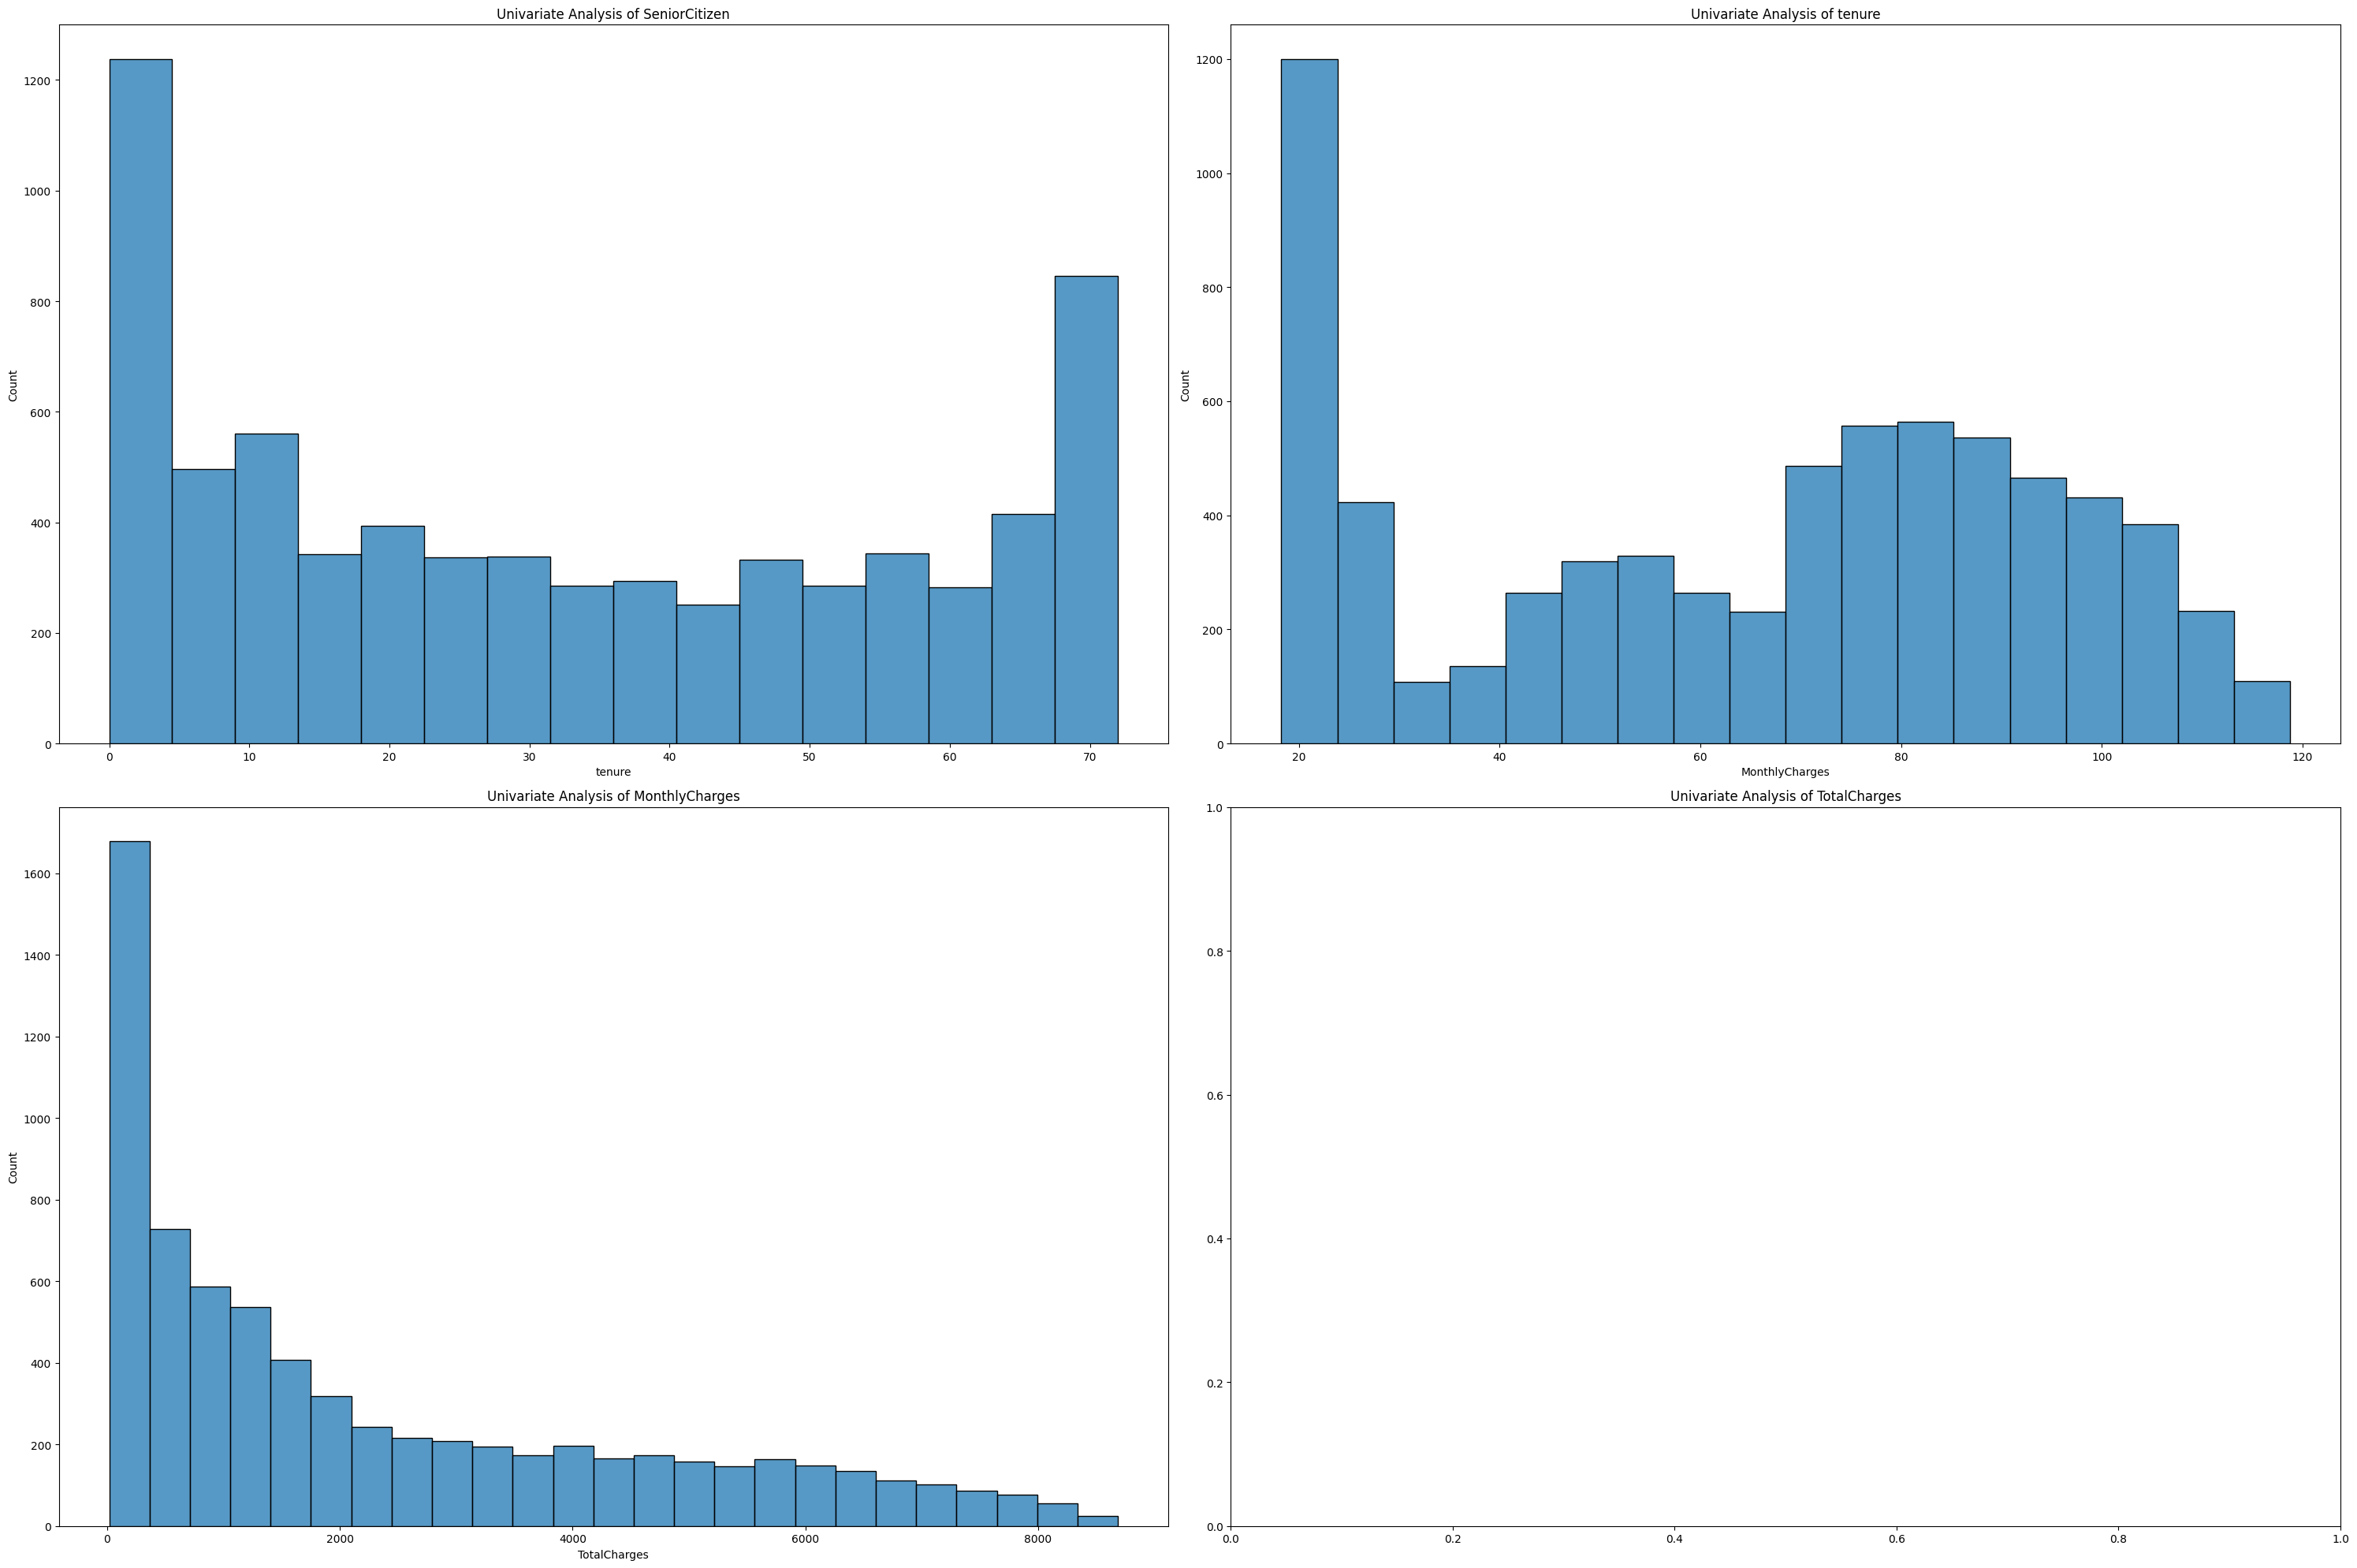

In [174]:
# Univariate Analysis
# Numarical columns
plt.figure(figsize=(30,20))
plotnumber=1
for col in data.columns:
    if data[col].dtype != 'object':
        sns.histplot(data[col])
        plt.subplot(2,2,plotnumber)
        plotnumber=plotnumber+1
        plt.title(f"Univariate Analysis of {col}")
plt.tight_layout()

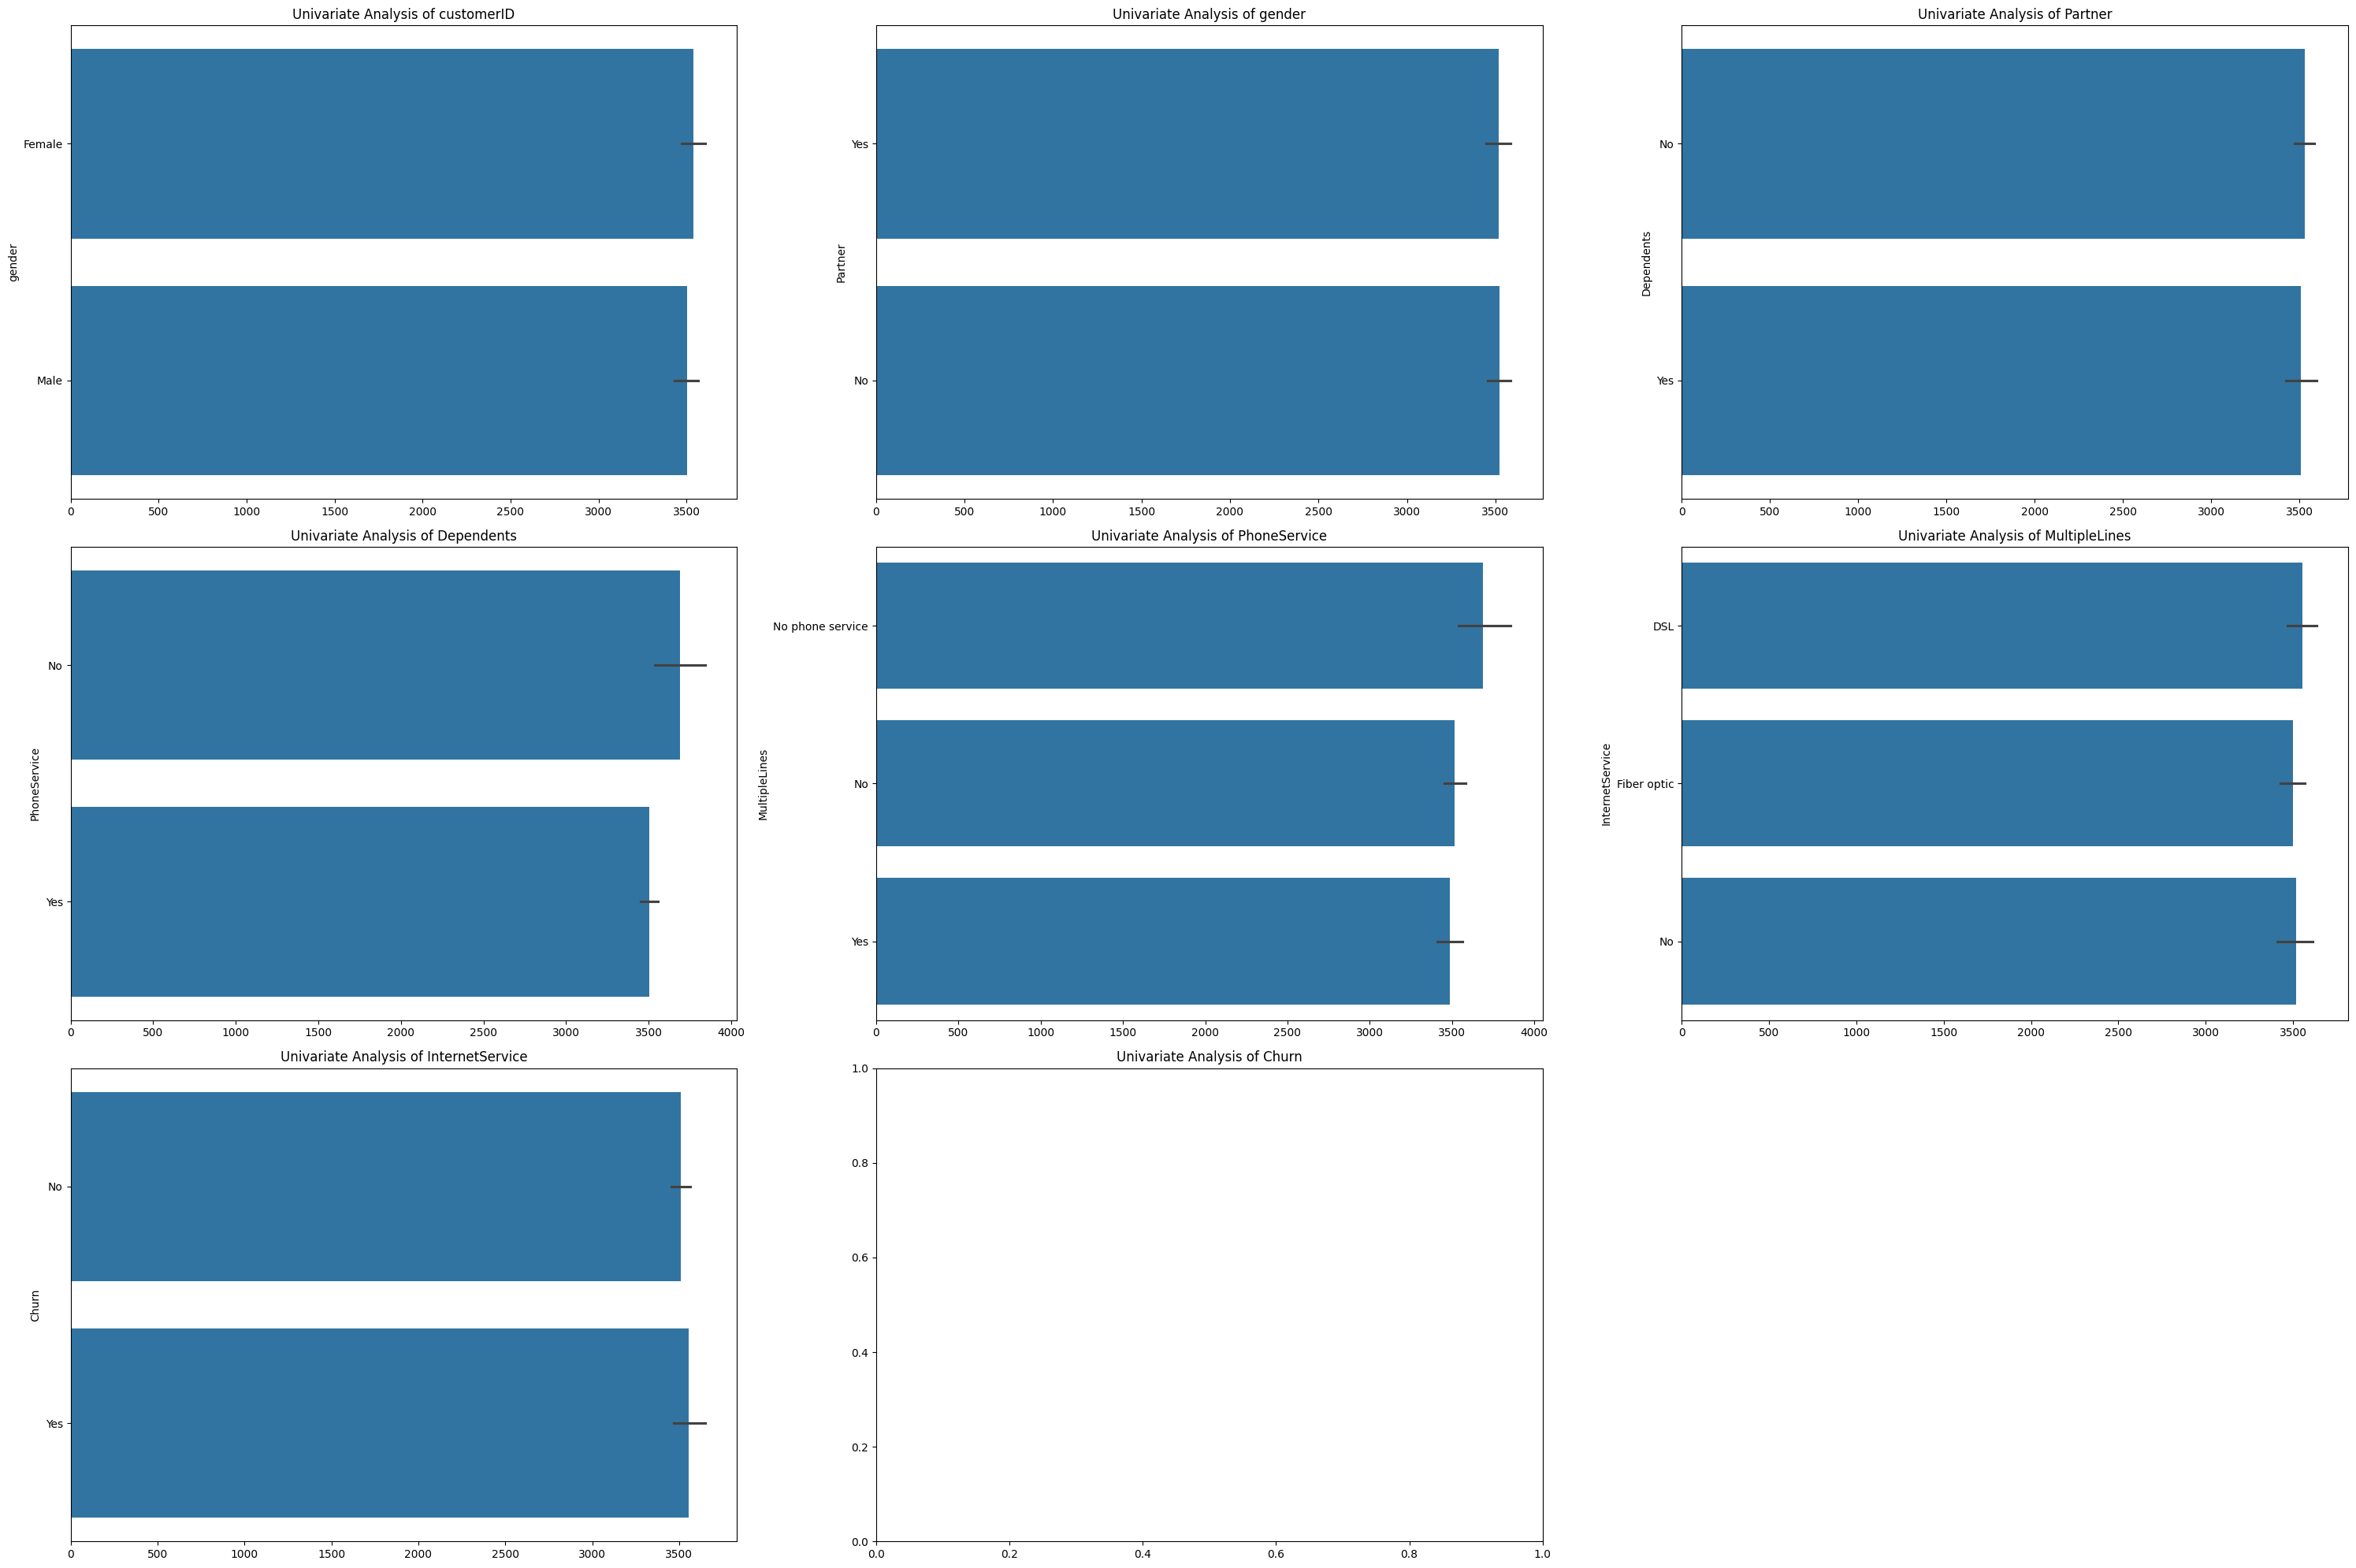

In [175]:
# Univariate Analysis
# Categorical columns
plt.figure(figsize=(30,20))
plotnumber=1
for col in data.columns:
    if data[col].dtype == 'object':
        sns.barplot(data[col])
        plt.subplot(3,3,plotnumber)
        plotnumber=plotnumber+1
        plt.title(f"Univariate Analysis of {col}")
plt.tight_layout()

# Bivariate Analysis




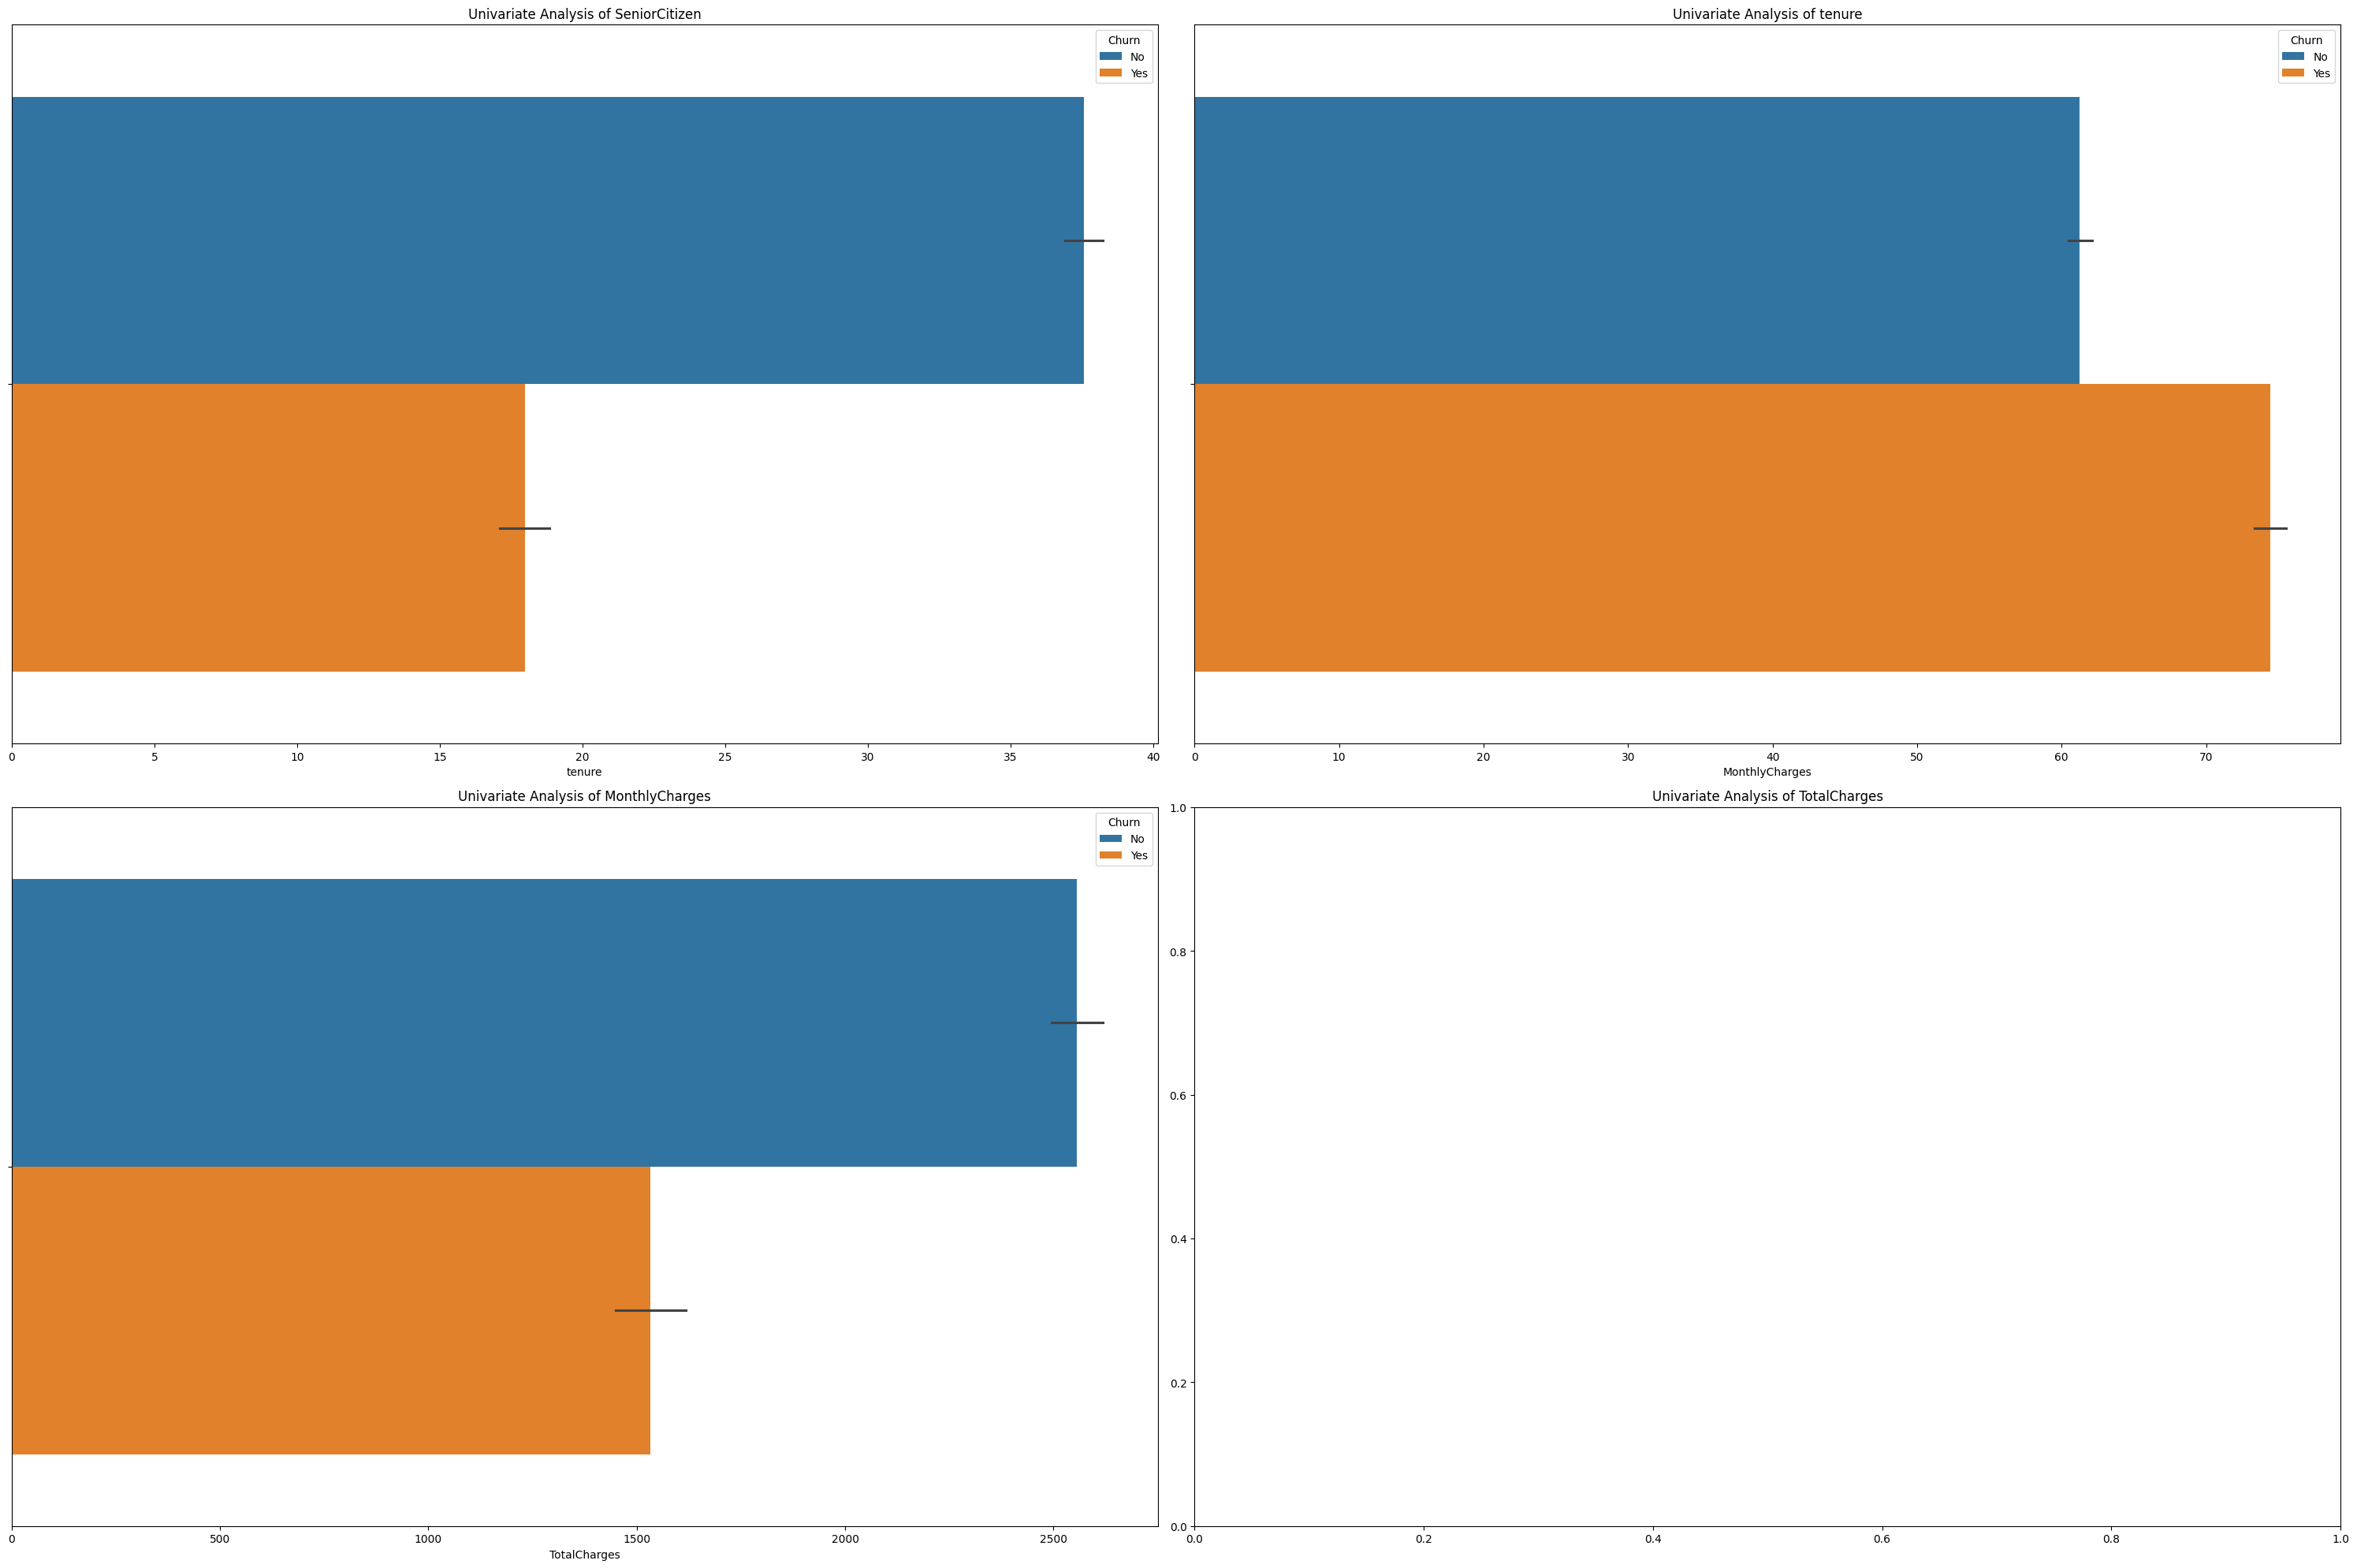

In [176]:
# Bivariate Analysis
#Numaric columns
plt.figure(figsize=(30,20))
plotnumber=1
for col in data.columns:
    if data[col].dtype != 'object':
        sns.barplot(data=data, x=col, hue='Churn')
        plt.subplot(2,2,plotnumber)
        plotnumber=plotnumber+1
        plt.title(f"Univariate Analysis of {col}")
plt.tight_layout()

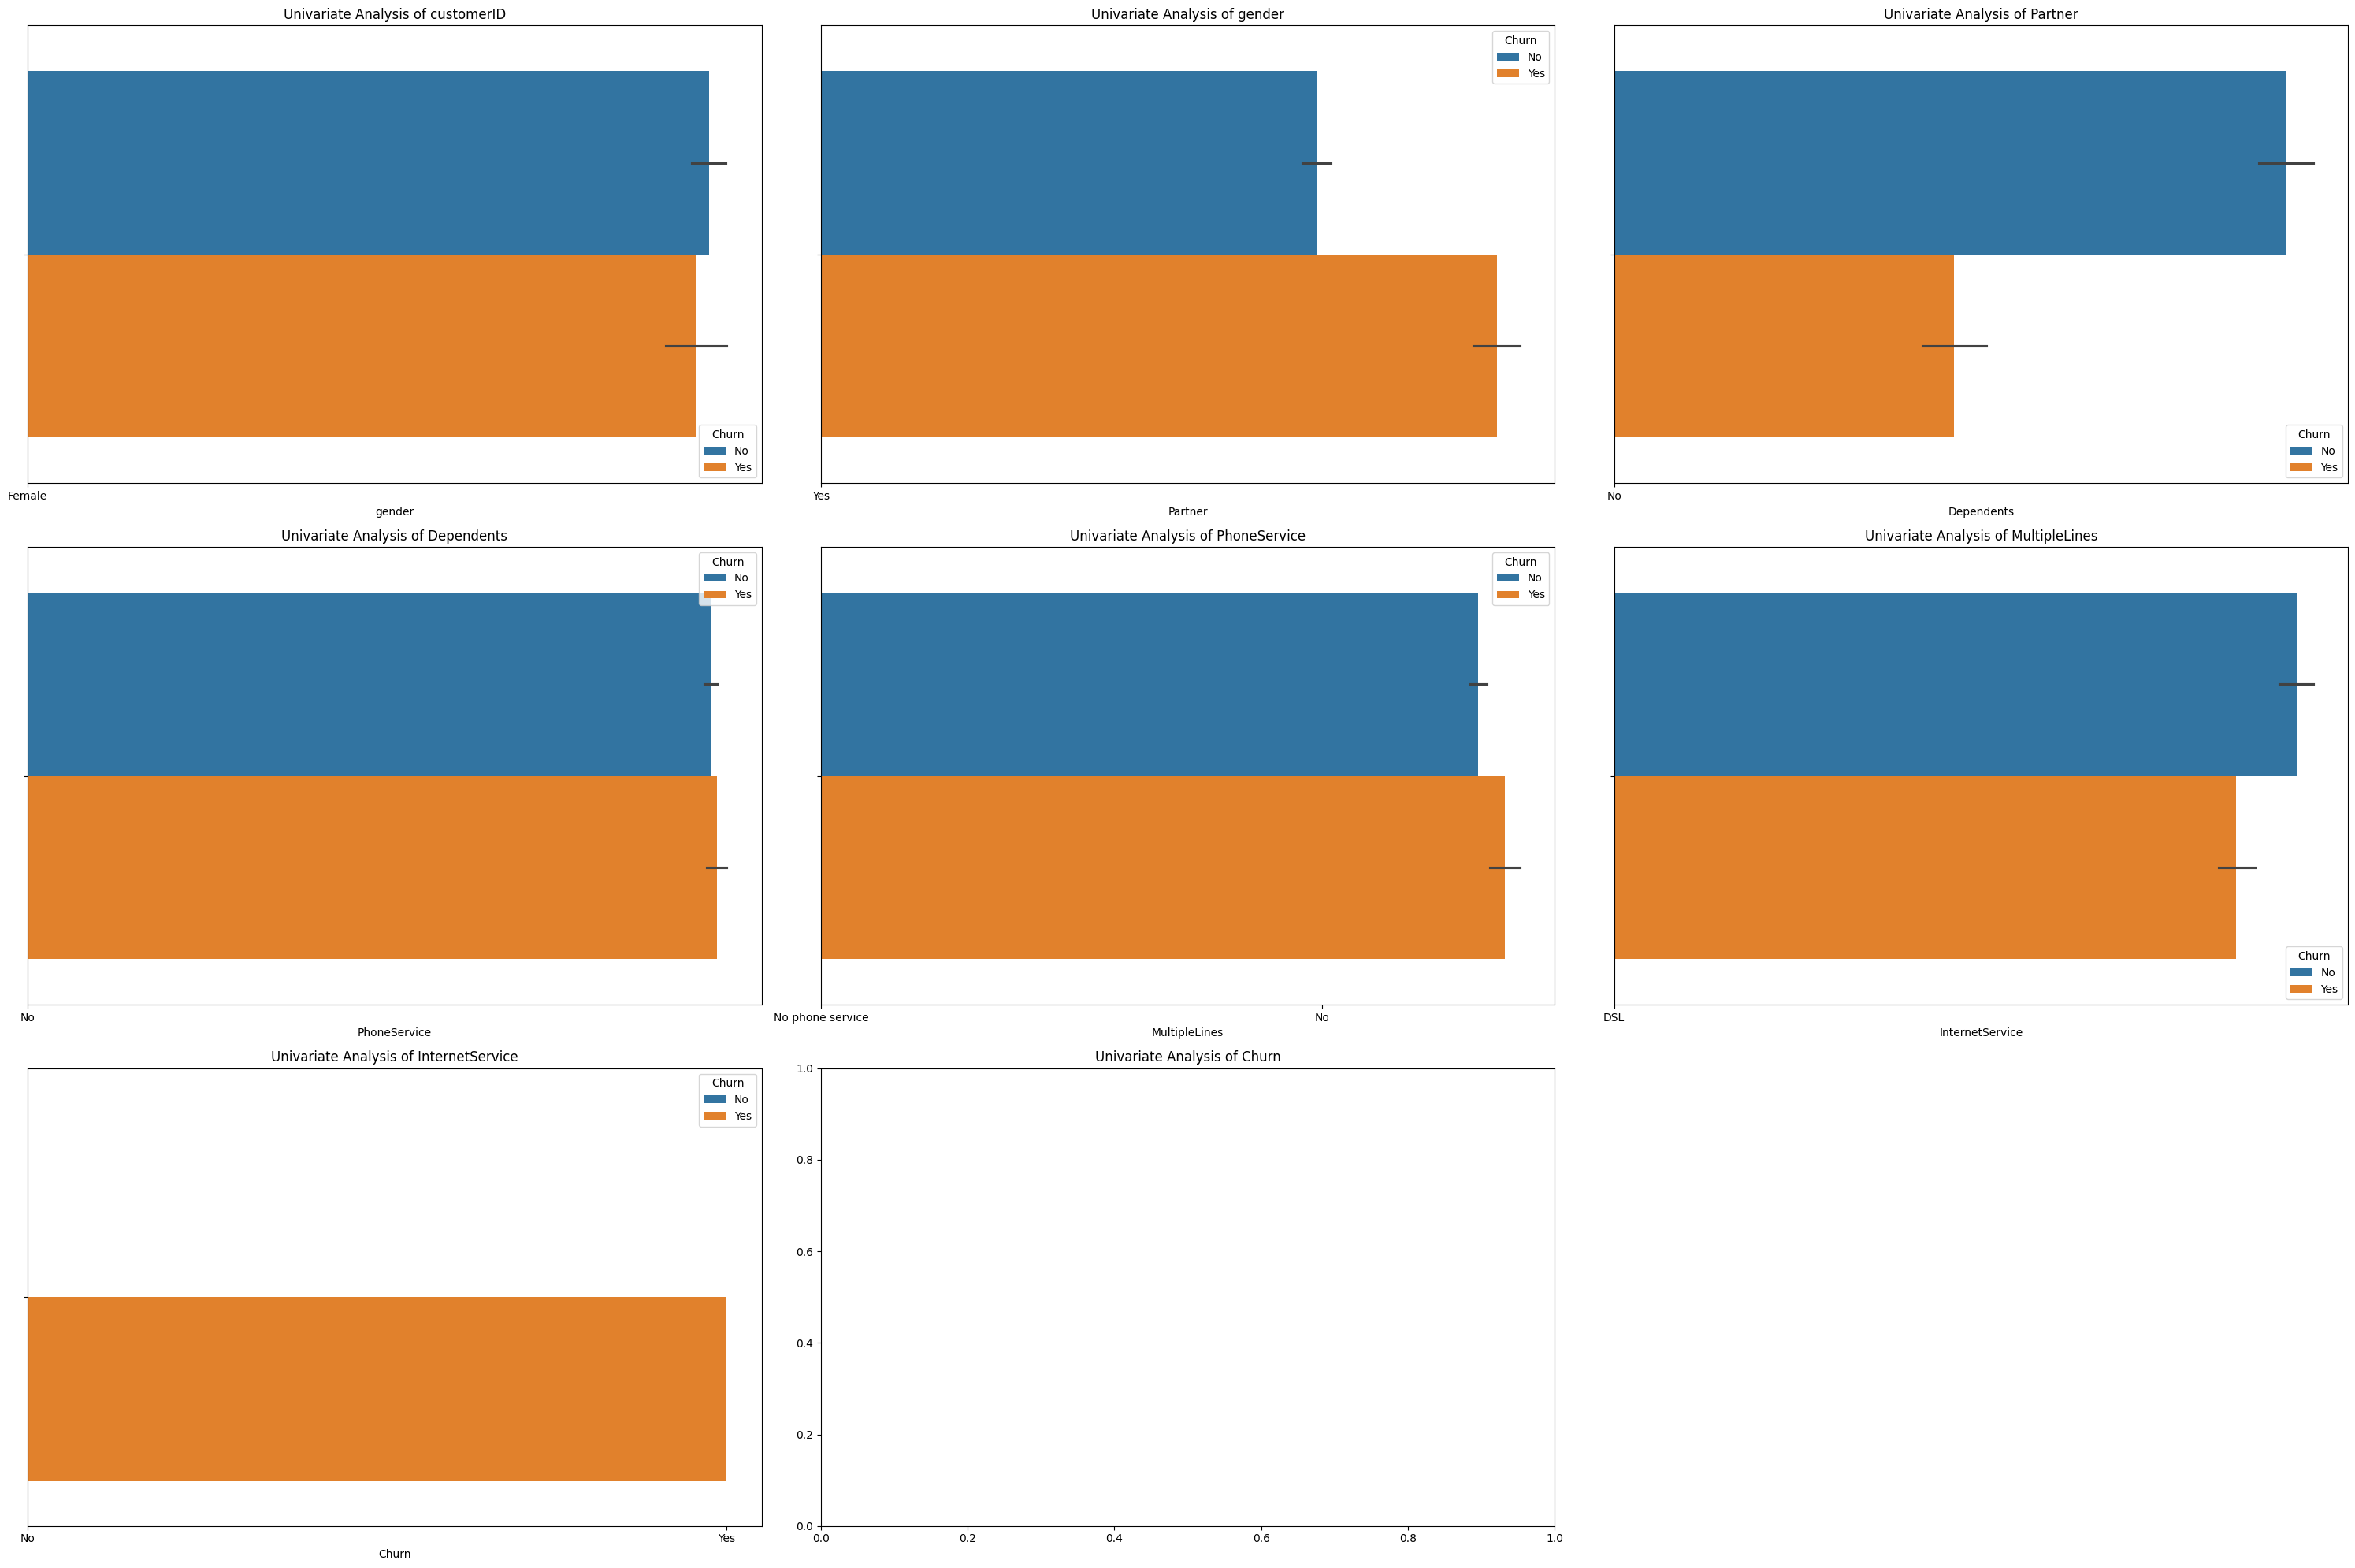

In [177]:
# Bivariate Analysis
plt.figure(figsize=(30,20))
plotnumber=1
for col in data.columns:
    if data[col].dtype == 'object':
        sns.barplot(data=data, x=col, hue='Churn')
        plt.subplot(3,3,plotnumber)
        plotnumber=plotnumber+1
        plt.title(f"Univariate Analysis of {col}")
plt.tight_layout()

  ## Steps in data preprocessing
      * Cleaning and handling missing or inconsistent data to ensure data quality.
      * Transforming and encoding features to make them suitable for machine learning algorithms, improving model performance.
      
         i)   Handling null values
         ii)  Handling Outliers
         iii) Encoding (converting categorical variables into numerical)
         iv)  Balancing the data
          v)   Scaling

<Axes: >

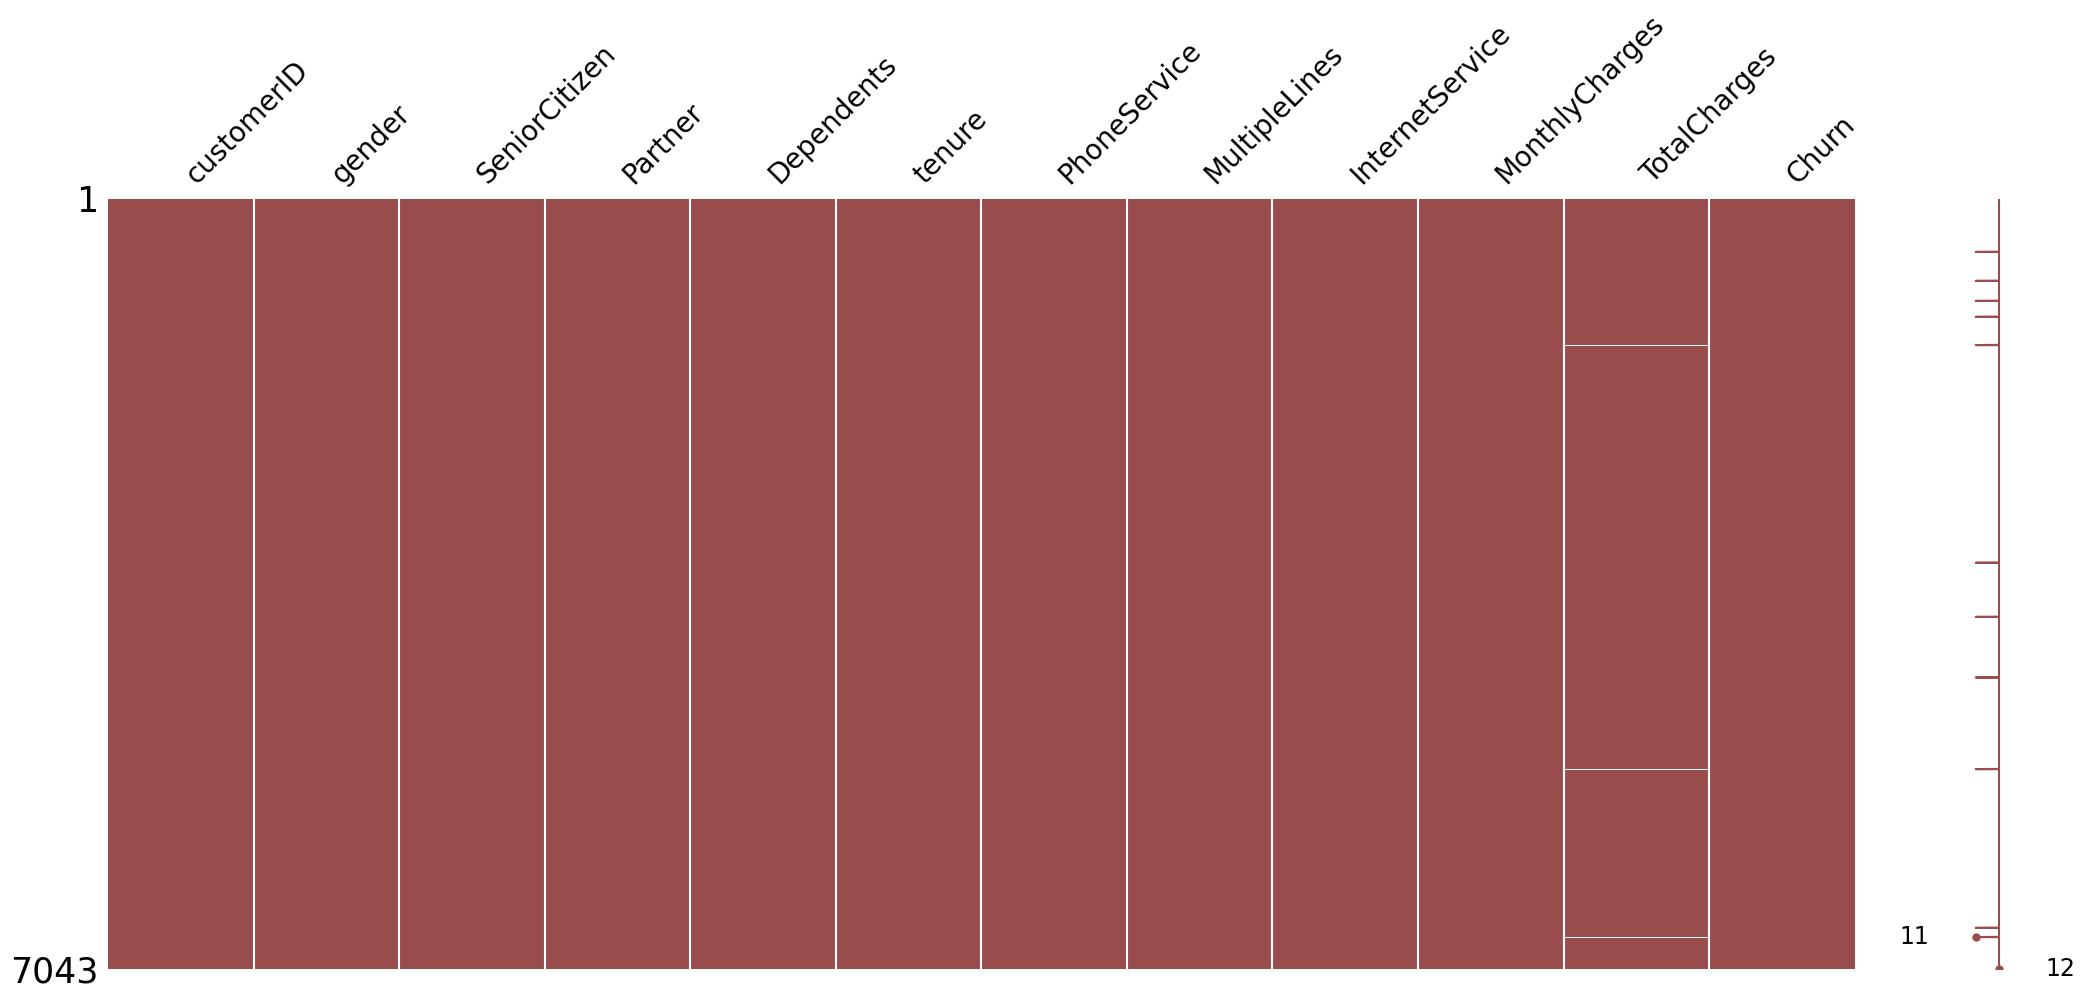

In [178]:
import missingno as msno
msno.matrix(data,color=(0.60,0.300,0.300),fontsize=20)

## Insights
* This plot is used for to find the null values Graphically

In [179]:
data.drop_duplicates(inplace=True)

In [180]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
MonthlyCharges      0
TotalCharges       11
Churn               0
dtype: int64

## Insights for Handling null values

* Numarical data are fill the meanvalue or median
* Categorical data are fill in mode

In [181]:
data['TotalCharges'].fillna(data['TotalCharges'].median(),inplace=True)

In [182]:
data.isnull().sum()

customerID         0
gender             0
SeniorCitizen      0
Partner            0
Dependents         0
tenure             0
PhoneService       0
MultipleLines      0
InternetService    0
MonthlyCharges     0
TotalCharges       0
Churn              0
dtype: int64

<Axes: >

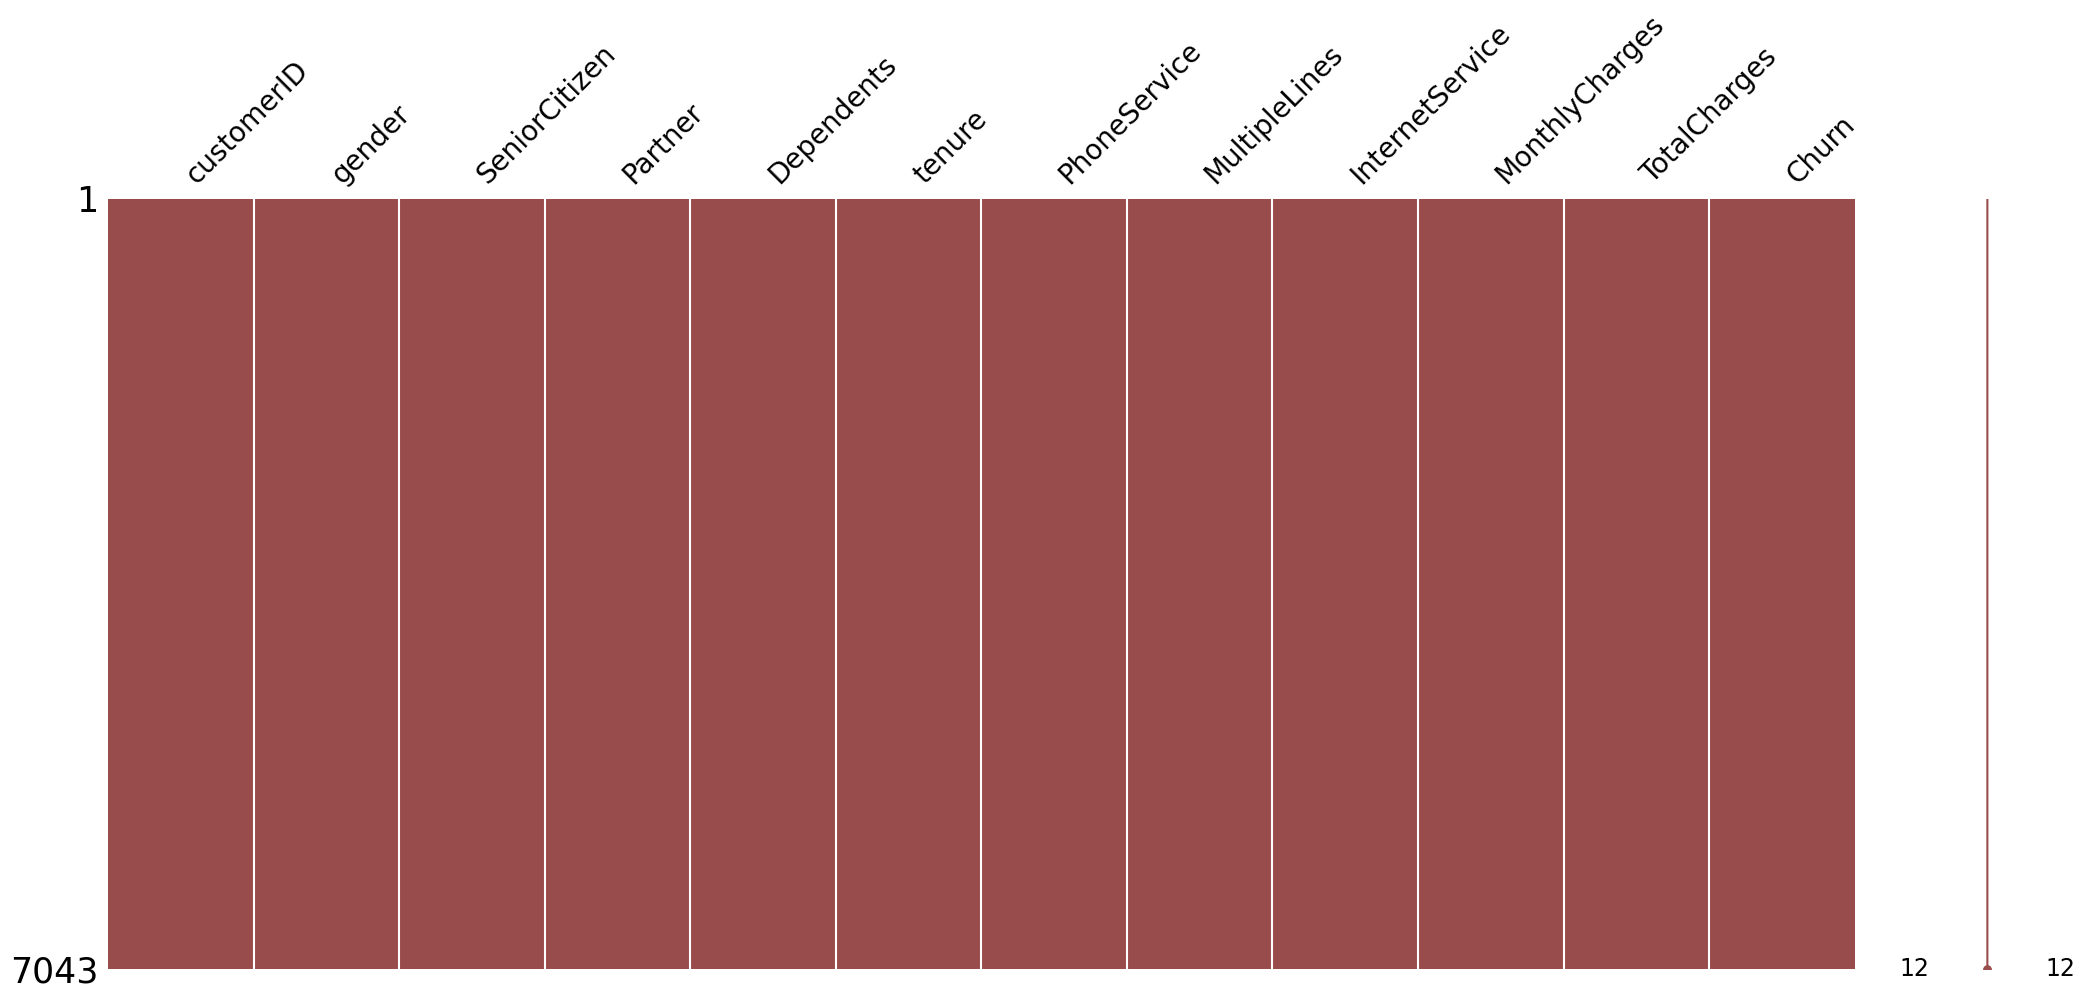

In [183]:
import missingno as msno
msno.matrix(data,color=(0.60,0.300,0.300),fontsize=20)

**Given data set numarical null values are filled by median**

**Finally we remove null values in the dataset**

## Removing Outliers

In [184]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,70.70,151.65,Yes


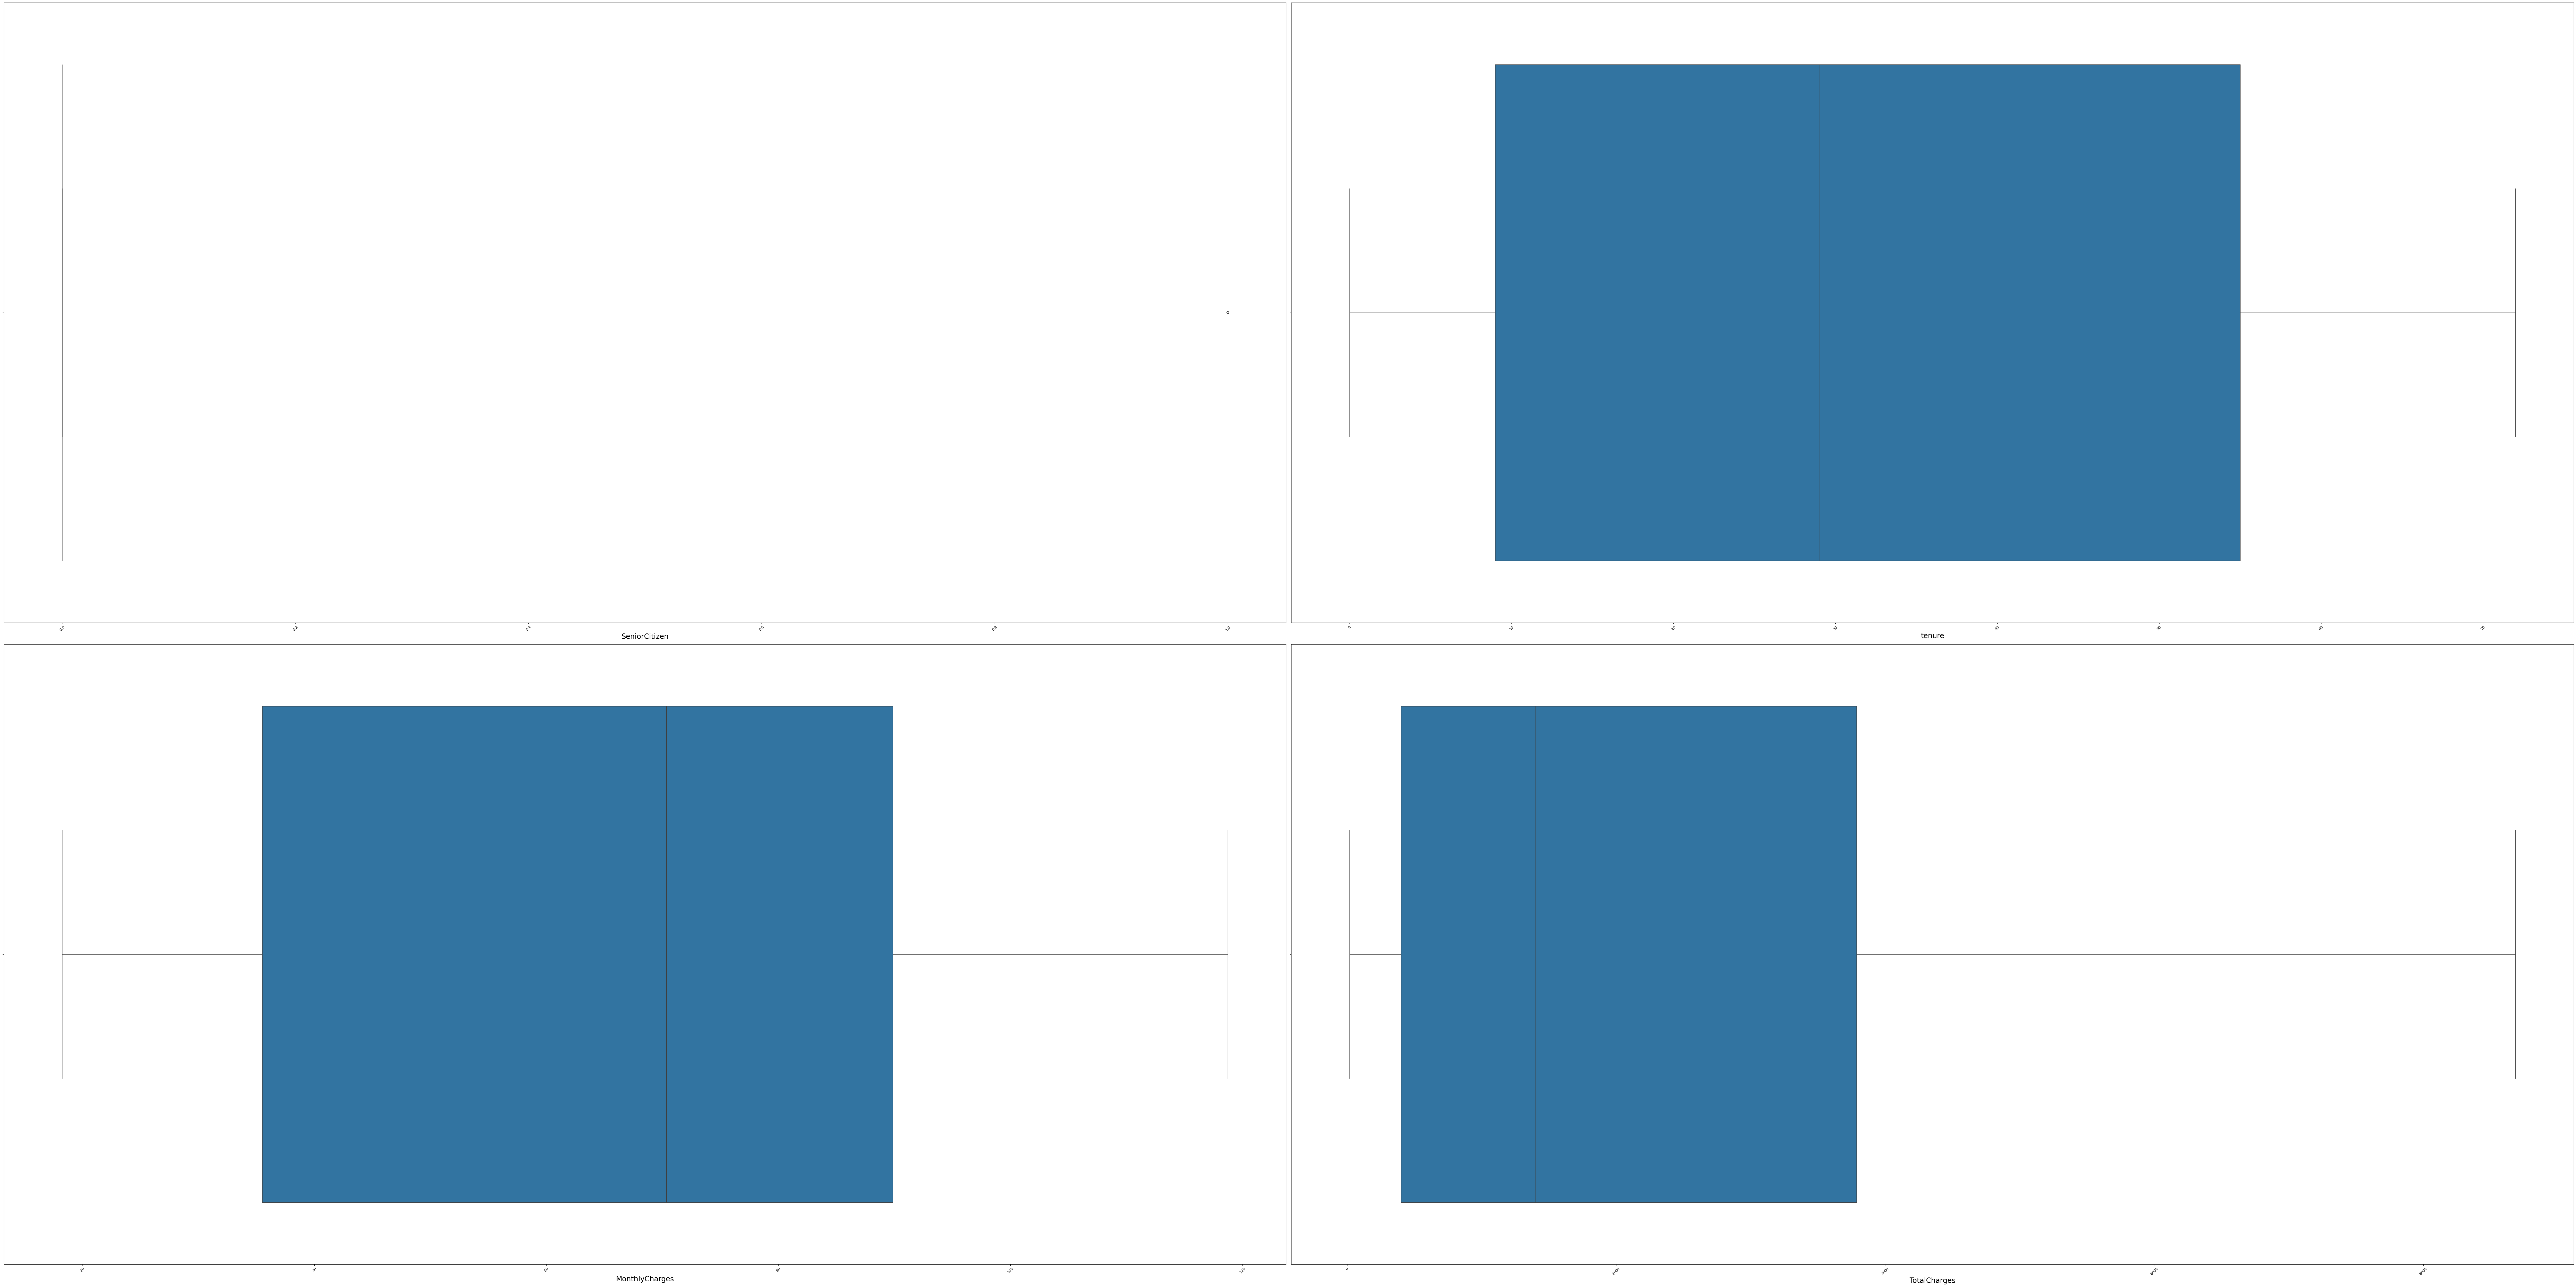

In [185]:
plt.figure(figsize=(100,50))
plotnumber=1
for i in data2:
    plt.subplot(2,2,plotnumber)
    sns.boxplot(x=data[i])
    plotnumber=plotnumber+1
    plt.xticks(rotation=45)
    plt.xlabel(i,fontsize=20)
plt.tight_layout()

## Insights
*  By using boxplot we find out the outliers Columns
* Here we dont have outliers

# Catagorical data convert into Numarical data

In [186]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [187]:
def encoding(data):
    le=LabelEncoder()
    for i in data.select_dtypes('object'):
        data[i]=le.fit_transform(data[i])
    return data

In [188]:
data=encoding(data)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,70.70,151.65,1


## Insights
* The LabelEncoder class in scikit-learn (sklearn) is a utility class that can be used to encode categorical labels into numerical values.
* It is commonly used for converting labels or target variables into a numeric representation, which can be easier to work with for certain machine learning algorithms.

## Scaling

In [189]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [190]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,70.70,151.65,1


In [191]:

columns_to_calculate = ['tenure', 'MonthlyCharges', 'TotalCharges']

for column in columns_to_calculate:
    start_value = data[column].min()
    end_value = data[column].max()

    print("Starting value for {}: {}".format(column, start_value))
    print("Ending value for {}: {}".format(column, end_value))

Starting value for tenure: 0
Ending value for tenure: 72
Starting value for MonthlyCharges: 18.25
Ending value for MonthlyCharges: 118.75
Starting value for TotalCharges: 18.8
Ending value for TotalCharges: 8684.8


In [192]:
data[['TotalCharges']]=scaler.fit_transform(data[['TotalCharges']])

## Insights
*  The MinMaxScaler class in scikit-learn (sklearn) is a data preprocessing technique that transforms features by scaling them to a specified range, typically between 0 and 1.
*  It is commonly used to normalize numeric features before applying machine learning algorithms.

## Feacture Selection

In [193]:
data.drop(['customerID'],axis=1,inplace=True)

In [194]:
data.drop(['Churn'],axis=1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,29.85,0.001275
1,1,0,0,0,34,1,0,0,56.95,0.215867
2,1,0,0,0,2,1,0,0,53.85,0.010310
3,1,0,0,0,45,0,1,0,42.30,0.210241
4,0,0,0,0,2,1,0,1,70.70,0.015330
...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,84.80,0.227521
7039,0,0,1,1,72,1,2,1,103.20,0.847461
7040,0,0,1,1,11,0,1,0,29.60,0.037809
7041,1,1,1,0,4,1,2,1,74.40,0.033210


In [195]:
data.drop(['Churn'],axis=1).corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,MonthlyCharges,TotalCharges
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.014569,-0.000002
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,0.220173,0.102652
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.096848,0.318364
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,-0.113890,0.063593
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.247900,0.825464
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,0.247398,0.113013
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.433576,0.452849
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.323260,-0.175588
MonthlyCharges,-0.014569,0.220173,0.096848,-0.113890,0.247900,0.247398,0.433576,-0.323260,1.000000,0.650864
TotalCharges,-0.000002,0.102652,0.318364,0.063593,0.825464,0.113013,0.452849,-0.175588,0.650864,1.000000


In [196]:
plt.figure(figsize=(100,100))
sns.heatmap(data.drop(['Churn'],axis=1).corr(),annot=True)

<Axes: >

## Model Selection

In [197]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,29.85,0.001275,0
1,1,0,0,0,34,1,0,0,56.95,0.215867,0
2,1,0,0,0,2,1,0,0,53.85,0.010310,1
3,1,0,0,0,45,0,1,0,42.30,0.210241,0
4,0,0,0,0,2,1,0,1,70.70,0.015330,1


In [198]:
x=data.drop(['Churn'],axis=1)

In [199]:
y=data.Churn
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [200]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=0.20)

In [201]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5634, 10)
(1409, 10)
(5634,)
(1409,)


## Insights
* Split the available data into training and testing sets.
* Use the training set to train and tune various models, and then evaluate their performance on the separate testing set.
* This helps estimate how well a model will generalize to unseen data.

## **Balencing the Target Variable**

    Balancing the target variable is important because:

    1.It helps prevent bias in machine learning models caused by imbalanced class distributions.
    2.It ensures that the model can learn equally from all classes, leading to better performance and generalization.

In [202]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [203]:
x_sm,y_sm=sm.fit_resample(x_train,y_train)

In [204]:
from collections import Counter
print(Counter(y_train))

Counter({0: 4138, 1: 1496})


In [205]:
print(Counter(y_sm))

Counter({1: 4138, 0: 4138})


## Insights
* By using SMOTE techique ,we balance the target variable

## Build and evaluvate the model

## LogisticRegression

In [206]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(x_sm,y_sm)
y_pred1=model1.predict(x_test)

## Evaluation of a Classification Model¶

In [207]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score
cm=confusion_matrix(y_test,y_pred1)
recall=recall_score(y_test,y_pred1,average='weighted')
precision=precision_score(y_test,y_pred1,average='weighted')
f1score=f1_score(y_test,y_pred1,average='weighted')
accuracy=accuracy_score(y_test,y_pred1)
print("CM:",cm)
print("Recall:",recall)
print("Precision:",precision)
print("F1 Score:",f1score)
print("Accuracy:",accuracy)

CM: [[787 249]
 [112 261]]
Recall: 0.7437899219304471
Precision: 0.7791486033526818
F1 Score: 0.754595819516986
Accuracy: 0.7437899219304471


## Support Vector Classifier Model

In [208]:
from sklearn.svm import SVC
model2= SVC()
model2.fit(x_sm, y_sm)
y_pred2=model2.predict(x_test)

## Evaluation of a Classification Model

In [209]:
cm=confusion_matrix(y_test,y_pred2)
recall=recall_score(y_test,y_pred2,average='weighted')
precision=precision_score(y_test,y_pred2,average='weighted')
f1score=f1_score(y_test,y_pred2,average='weighted')
accuracy=accuracy_score(y_test,y_pred2)
print("CM:",cm)
print("Recall:",recall)
print("Precision:",precision)
print("F1 Score:",f1score)
print("Accuracy:",accuracy)

CM: [[732 304]
 [ 91 282]]
Recall: 0.7196593328601846
Precision: 0.7813673904720652
F1 Score: 0.7347316569119617
Accuracy: 0.7196593328601846


##  DecisionTreeClassifier  

In [210]:
from sklearn.tree import DecisionTreeClassifier
model3= DecisionTreeClassifier()
model3.fit(x_sm,y_sm)
y_pred3=model3.predict(x_test)

 ## Evaluation of a Classification Model

In [211]:
cm=confusion_matrix(y_test,y_pred3)
recall=recall_score(y_test,y_pred3,average='weighted')
precision=precision_score(y_test,y_pred3,average='weighted')
f1score=f1_score(y_test,y_pred3,average='weighted')
accuracy=accuracy_score(y_test,y_pred3)
print("CM:",cm)
print("Recall:",recall)
print("Precision:",precision)
print("F1 Score:",f1score)
print("Accuracy:",accuracy)

CM: [[795 241]
 [161 212]]
Recall: 0.7146912704045423
Precision: 0.7353356302728784
F1 Score: 0.7227785828190503
Accuracy: 0.7146912704045423


## RandomForestClassifier

In [212]:
from sklearn.ensemble import RandomForestClassifier
model4=RandomForestClassifier()
model4.fit(x_sm,y_sm)
y_pred4=model4.predict(x_test)

## Evaluation of a Classification Model

In [213]:
cm=confusion_matrix(y_test,y_pred4)
recall=recall_score(y_test,y_pred4,average='weighted')
precision=precision_score(y_test,y_pred4,average='weighted')
f1score=f1_score(y_test,y_pred4,average='weighted')
accuracy=accuracy_score(y_test,y_pred4)
print("CM:",cm)
print("Recall:",recall)
print("Precision:",precision)
print("F1 Score:",f1score)
print("Accuracy:",accuracy)

CM: [[843 193]
 [146 227]]
Recall: 0.759403832505323
Precision: 0.7698078761609035
F1 Score: 0.76374162786989
Accuracy: 0.759403832505323


## XGBRFClassifier

In [214]:
from xgboost import XGBRFClassifier
model5=XGBRFClassifier()
model5.fit(x_sm,y_sm)
y_pred5=model5.predict(x_test)

##  Evaluation of a Classification Model

In [215]:
cm=confusion_matrix(y_test,y_pred5)
recall=recall_score(y_test,y_pred5,average='weighted')
precision=precision_score(y_test,y_pred5,average='weighted')
f1score=f1_score(y_test,y_pred5,average='weighted')
accuracy=accuracy_score(y_test,y_pred5)
print("CM:",cm)
print("Recall:",recall)
print("Precision:",precision)
print("F1 Score:",f1score)
print("Accuracy:",accuracy)

CM: [[765 271]
 [ 97 276]]
Recall: 0.7388218594748048
Precision: 0.786106960110402
F1 Score: 0.7515484156121156
Accuracy: 0.7388218594748048


## GradientBoostingClassifier

In [216]:

import sklearn
model6=sklearn.ensemble.GradientBoostingClassifier()
model6.fit(x_sm,y_sm)
y_pred6=model6.predict(x_test)

##  Evaluation of a Classification Model

In [217]:
cm=confusion_matrix(y_test,y_pred6)
recall=recall_score(y_test,y_pred6,average='weighted')
precision=precision_score(y_test,y_pred6,average='weighted')
f1score=f1_score(y_test,y_pred6,average='weighted')
accuracy=accuracy_score(y_test,y_pred6)
print("CM:",cm)
print("Recall:",recall)
print("Precision:",precision)
print("F1 Score:",f1score)
print("Accuracy:",accuracy)

CM: [[790 246]
 [108 265]]
Recall: 0.7487579843860894
Precision: 0.7841288575657543
F1 Score: 0.7594048537160761
Accuracy: 0.7487579843860894


## Gridserched CV

In [218]:
from sklearn.ensemble import GradientBoostingClassifier

In [219]:
from sklearn.model_selection import GridSearchCV
model = GradientBoostingClassifier()

n_estimators   = [100, 200, 500]
learning_rates = [0.03,0.1,0.3]


# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators' : n_estimators,
    'learning_rate':learning_rates,

    }

grid_cv = GridSearchCV(estimator = model,
            param_grid = hyperparameter_grid,
            scoring = 'neg_mean_absolute_error',
            return_train_score = True)

grid_cv.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.03, 0.1, 0.3],
                         'n_estimators': [100, 200, 500]},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [220]:
grid_cv.best_score_

-0.20571315096430104

In [221]:
grid_cv.best_estimator_

GradientBoostingClassifier(learning_rate=0.03, n_estimators=200)

In [222]:
model7= grid_cv.best_estimator_
y_pred7 = model7.predict(x_test)

## Evaluation of a Classification Model

In [223]:
cm=confusion_matrix(y_test,y_pred7)
recall=recall_score(y_test,y_pred7,average='weighted')
precision=precision_score(y_test,y_pred7,average='weighted')
f1score=f1_score(y_test,y_pred7,average='weighted')
accuracy=accuracy_score(y_test,y_pred7)
print("CM:",cm)
print("Recall:",recall)
print("Precision:",precision)
print("F1 Score:",f1score)
print("Accuracy:",accuracy)

CM: [[948  88]
 [193 180]]
Recall: 0.8005677785663591
Precision: 0.7887034238864589
F1 Score: 0.7890430849810972
Accuracy: 0.8005677785663591


##  Cross Validation in All Algorithms

In [224]:
list_of_models=[model1,model2,model3,model4,model5,model6,model7]

In [225]:
from sklearn.model_selection import cross_val_score
accuracy_cvs=[]
for i in list_of_models:
    cvs=cross_val_score(i,x,y,cv=5,scoring='accuracy')
    p=cvs.mean()
    accuracy_cvs.append(p)
accuracy_cvs

[0.792417958416672,
 0.7884435084521582,
 0.7251154308342475,
 0.7743857466610751,
 0.794689879185754,
 0.7945472288534744,
 0.7973872306277825]

In [226]:
names_of_algorithms=['LogisticRegression','Support Vector Classifier Model','DecisionTreeClassifier','RandomForestClassifier','XGBRFClassifier','GradientBoostingClassifier','GridsechedCV']

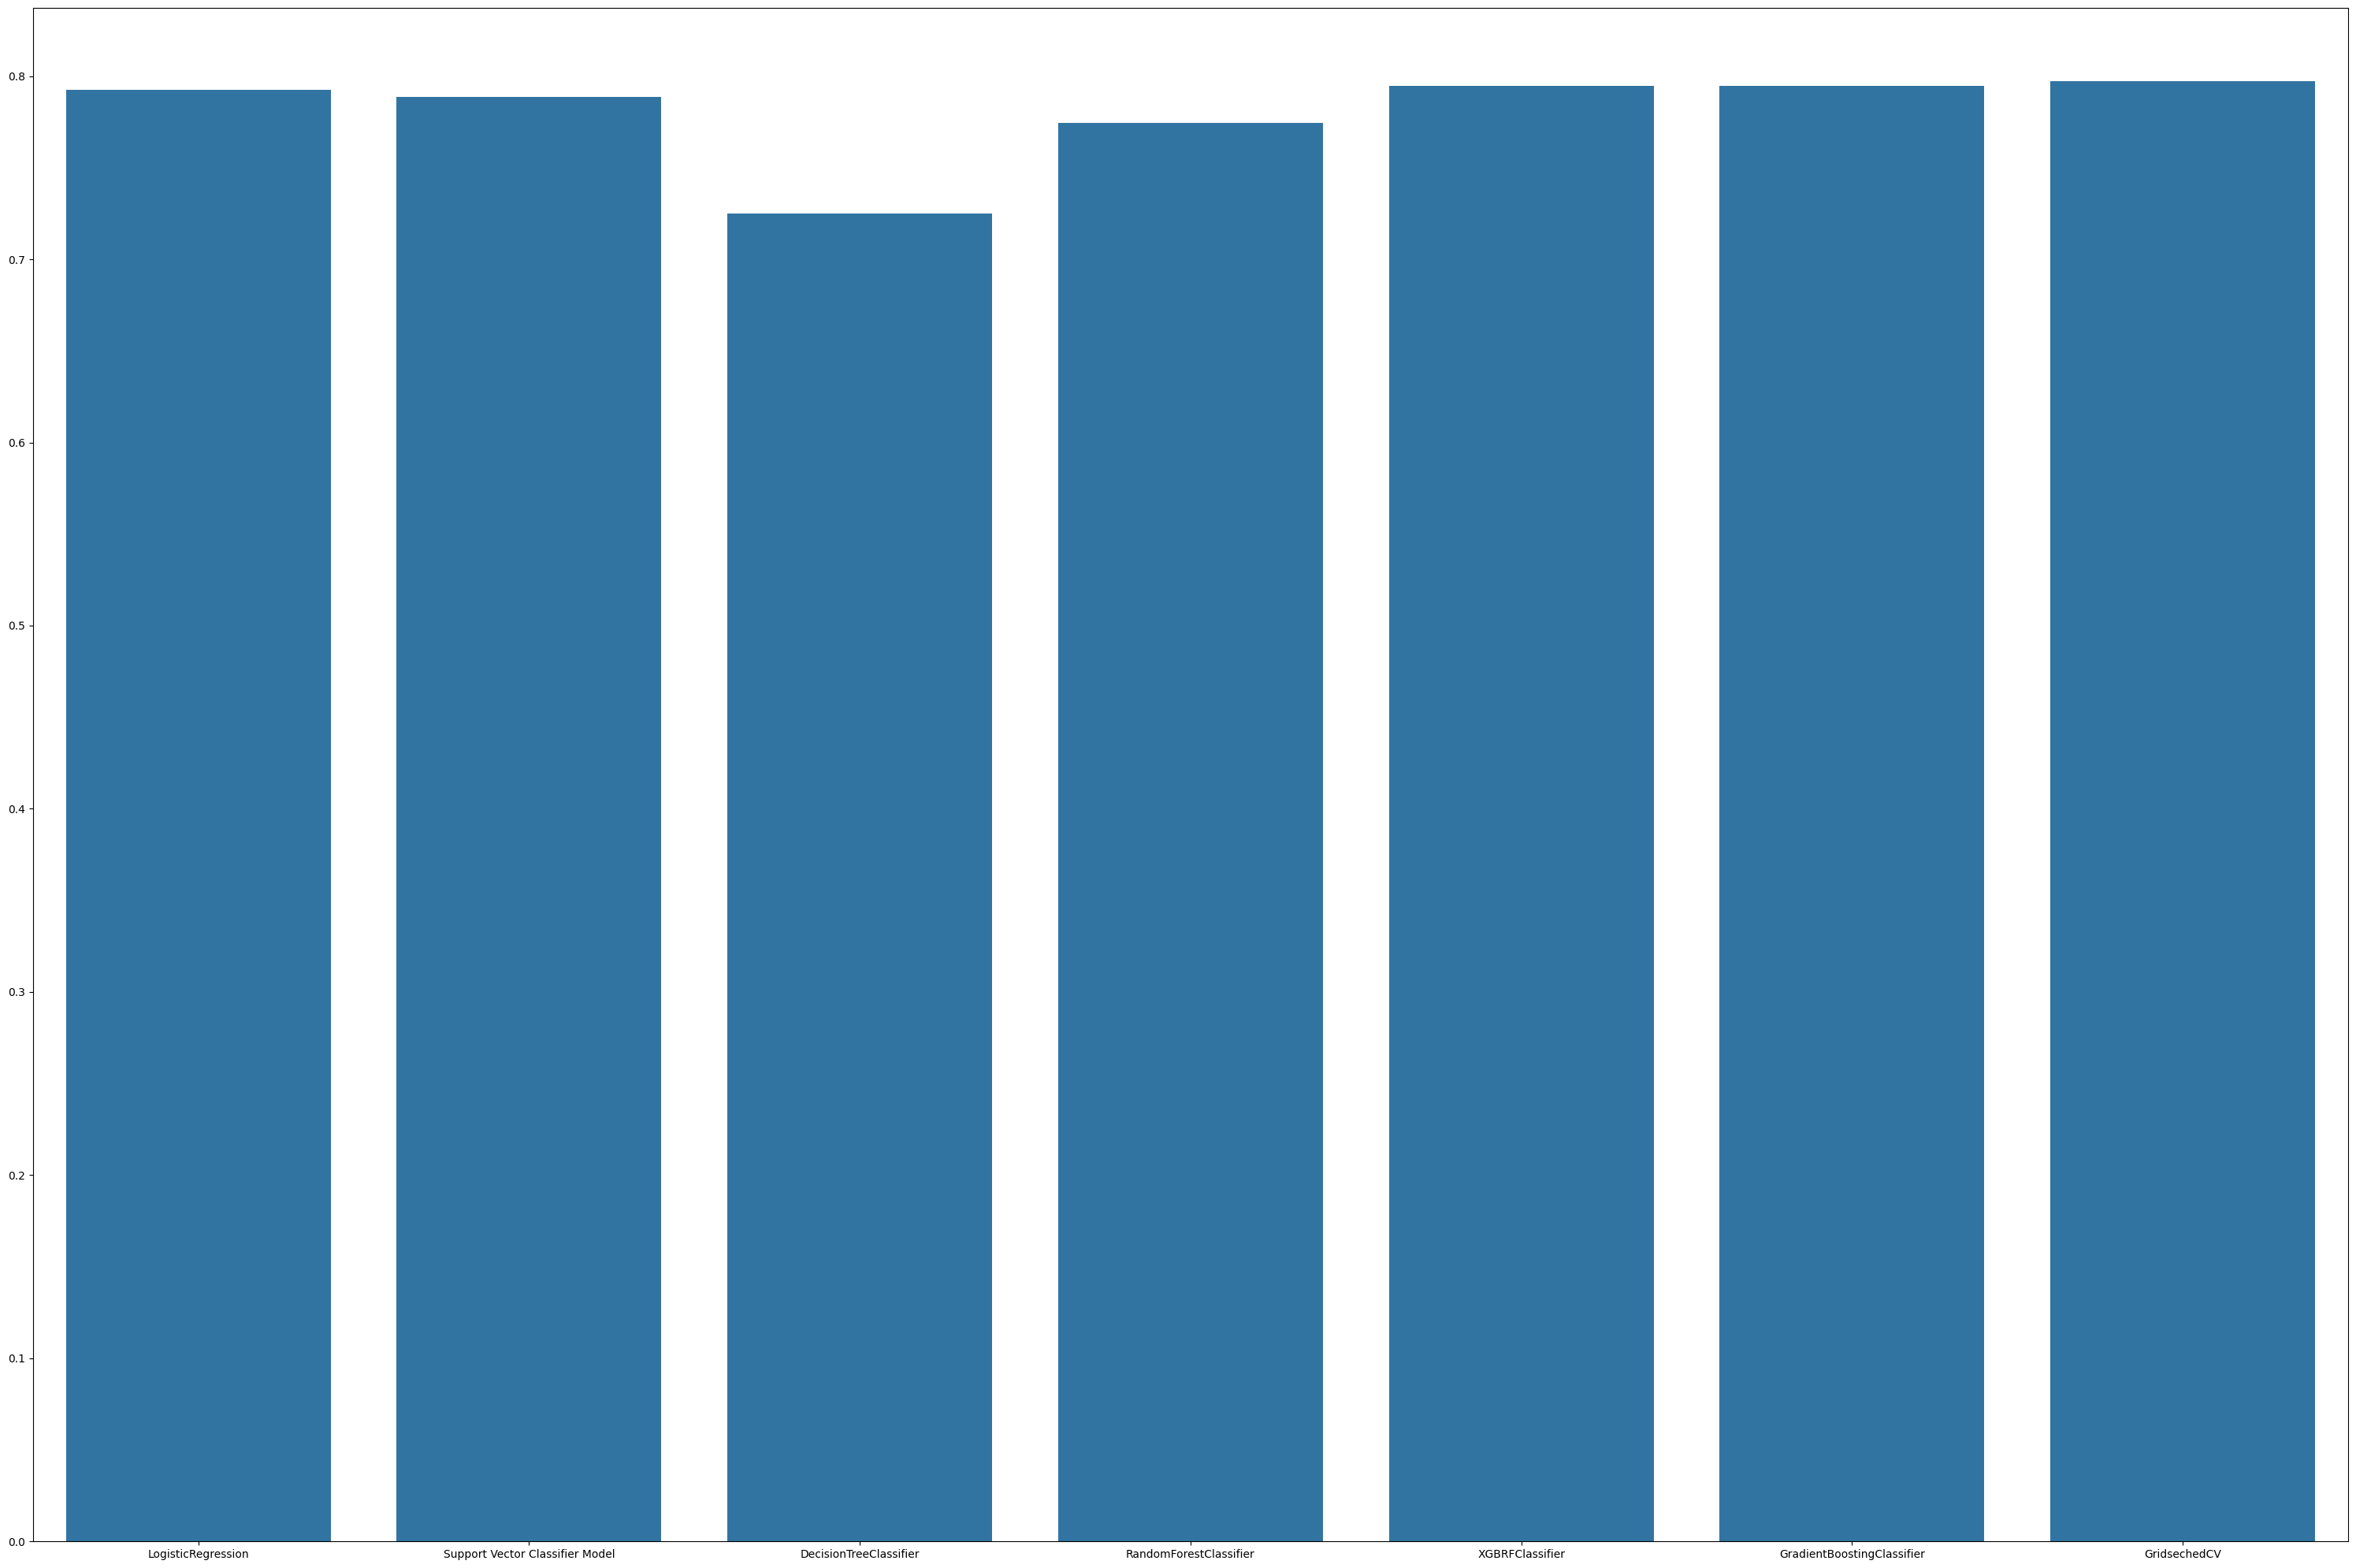

In [227]:
plt.figure(figsize=(30,20))
sns.barplot(x=names_of_algorithms,y=accuracy_cvs)
plt.tight_layout()

# Finalizing the algorithm
* Among all algorithms ,i am apply the  GridSearchCV in GradientBoostingClassifier to get the better accuracy score

# Deployment

In [228]:
import pickle as pkl
pkl.dump(model7,open("churn_prediction","wb"))
read=pkl.load(open("churn_prediction","rb"))

In [229]:
data=[0	,0	,0	,1,	28,	1,	0,	2	,20.25,	0.059607]
Prediction=read.predict([data])[0]
print(Prediction)

if Prediction==0:
    print("Represents no chrun.")
else:
    print("Represents chrun.")

0
Represents no chrun.


In [230]:
x_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,MonthlyCharges,TotalCharges
7011,0,0,0,0,4,1,0,0,60.40,0.029235
3323,0,0,0,1,28,1,0,2,20.25,0.059607
4102,1,0,1,1,7,1,0,0,44.75,0.036332
4234,0,0,0,0,16,1,0,2,19.05,0.035524
3610,0,0,0,0,12,1,2,1,100.15,0.132183


In [231]:
y_train.head()

7011    1
3323    0
4102    0
4234    0
3610    1
Name: Churn, dtype: int64

In [232]:
x_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'MonthlyCharges',
       'TotalCharges'],
      dtype='object')

In [233]:
data=[0	,0	,0	,1,	28,	1,	0,	2	,20.25,	0.059607]
Prediction=read.predict([data])[0]
print(Prediction)


0


## **Conclusion:**

Predicting churn is a critical task for businesses aiming to retain customers and maintain profitability. Through a comprehensive analysis of various factors such as customer demographics, behavior patterns, usage history, and interaction data, predictive models can effectively forecast the likelihood of churn. By employing advanced machine learning algorithms such as logistic regression, decision trees, random forests, businesses can build robust churn prediction models.

### **The Process:**

1. **Data Collection:** Gathering relevant data points including customer demographics, transaction history, service usage, interactions, and feedback.
2. **Data Preprocessing:** Cleaning and preparing the data by handling missing values, encoding categorical variables, and scaling numerical features.
3. **Feature Selection:** Identifying the most influential features that contribute to churn prediction using techniques such as correlation analysis, feature importance scores, or domain knowledge.
4. **Model Selection:** Choosing the appropriate machine learning algorithm based on the dataset characteristics, scalability, interpretability, and performance requirements.
5. **Model Training:** Splitting the data into training and testing sets, fitting the selected model to the training data, and fine-tuning hyperparameters through techniques like cross-validation.
6. **Model Evaluation:** Assessing the performance of the trained model using evaluation metrics such as accuracy, precision, recall, F1-score, ROC-AUC, or lift.
7. **Deployment:** Integrating the churn prediction model into the business operations, often within customer relationship management (CRM) systems or analytics platforms, to generate real-time predictions.
8. **Monitoring and Iteration:** Continuously monitoring the model's performance in production, retraining it periodically with updated data, and refining the prediction process based on feedback and insights gained from ongoing analysis.

In conclusion, churn prediction empowers businesses to proactively identify at-risk customers, personalize retention strategies, and optimize resource allocation to mitigate churn effectively. By leveraging data-driven insights, businesses can foster long-term customer relationships and sustain competitive advantage in dynamic markets.
